In [28]:
#importing library
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Define a simple range of values for x and reshape
np.random.seed(127)
x=np.linspace(0,1,200)
noise=np.random.normal(0,0.02,x.shape)
x=x+noise
x=np.sort(x)

#y=(2*np.sin(10*x)+np.cos(20*x-3)+3*np.log(10*x+0.5)-4)/6
y=np.cos(x)+0.8*x-0.5
noise=np.random.normal(0,0.003,x.shape)
y=y+noise
x=x-0.5

In [30]:
#lets build a function to scatter func for reusability
#it takes x axis and yaxis element to populate the graph
def scatter_func(x,y):
  plt.figure(figsize=(12,5))
  plt.scatter(x,y,color='g',label='data points')
  plt.title('x vs y')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()


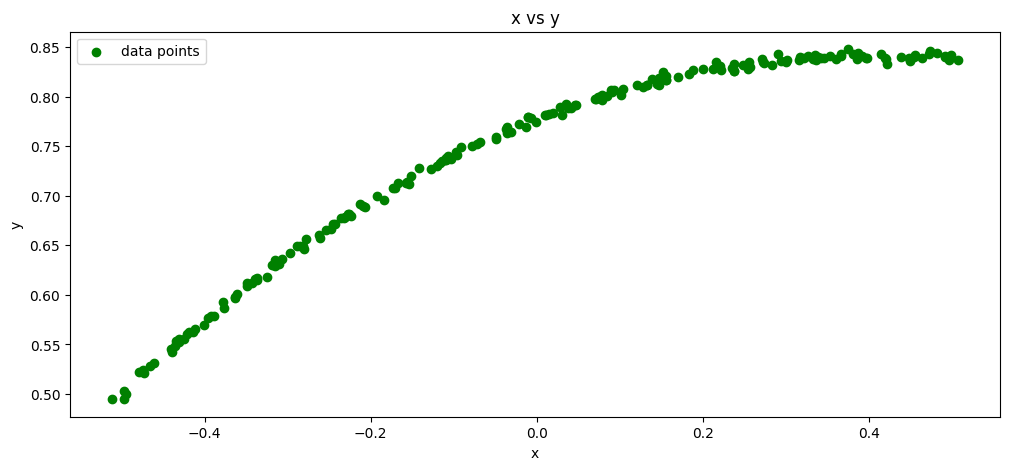

In [31]:
scatter_func(x,y)

In [32]:
#lets create a error calculation function to calculate average loss(cost)
def error_calculation(m,b,x,y):
  total_error=0
  N=len(x)
  for i in range(N):
    actual_output=y[i]
    inp=x[i]
    predicted_output=m*inp+b
    total_error=total_error+(actual_output-predicted_output)**2
    return total_error/N



In [33]:
#Check the function works
print(error_calculation(2,3,x,y))

0.010981347374179197


In [34]:
#Lets create a plot_function to plot the line for reusability
#here we only give x and calculate y for given x
def plot_func(b,m,x):
  plt.plot(x,m*x+b,label='Fitting line',color='r')
  plt.legend(loc='best')

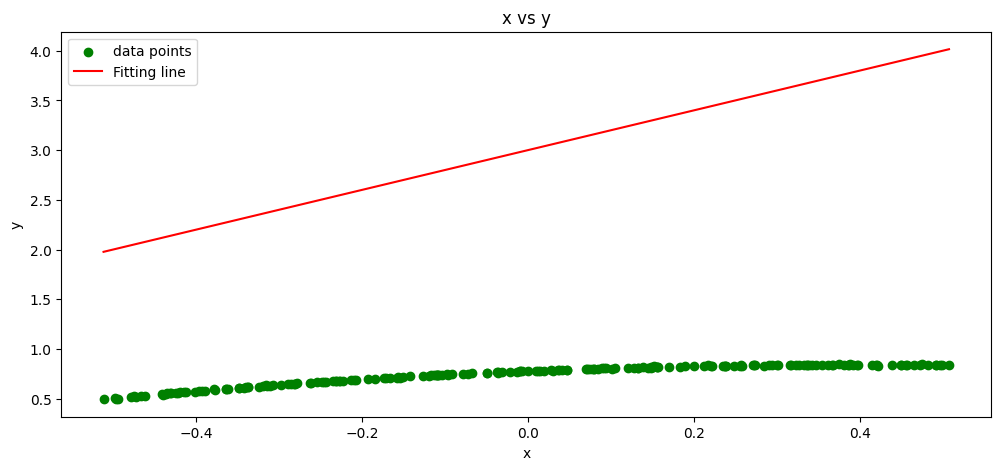

In [35]:
scatter_func(x,y)
plot_func(3,2,x)
plt.show()

Here line with slope 3 and bias 2 doesnt seem to fit the points so we need to find the best slope and bias which can best fit the data points

#Visualizing the error surface in 3d

C:\Users\Legion\AppData\Local\Temp\ipykernel_11212\4165256893.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


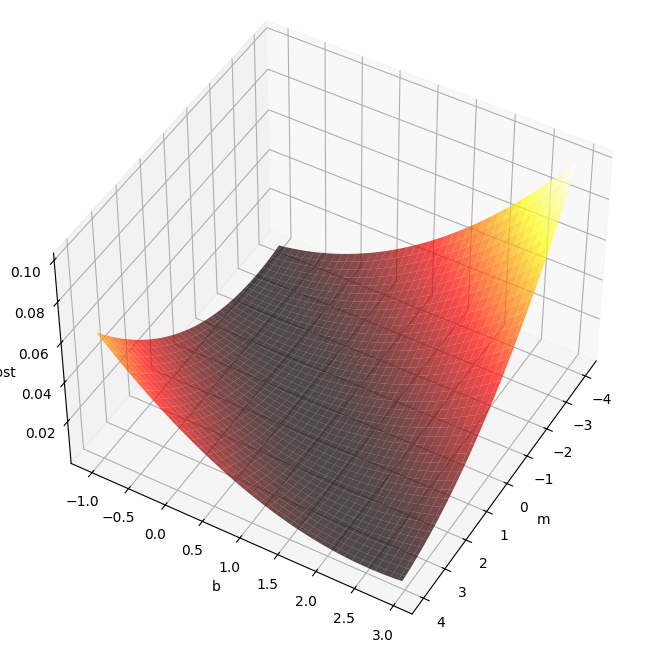

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111, projection='3d')
ax.view_init(45,30)
fig.show()

m__=np.arange(-4,4,0.05)
b__=np.arange(-1,3,0.05)
u__,v__=np.meshgrid(m__,b__)
cost=np.array([error_calculation(m,b,x,y) for m,b in zip(np.ravel(u__),np.ravel(v__))])
z__=cost.reshape(u__.shape)
ax.clear()
ax.plot_surface(u__,v__,z__,cmap='hot',alpha=0.7)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('cost')
plt.show()

#Implementing gradient descent

In [37]:
def gradient_descent(m,b,inp,op):
  m_grad=0
  b_grad=0
  N=len(x)

  for i in range(N):
    m_grad=m_grad+((2/N)*(m*inp[i]+b-op[i]))*inp[i]
    b_grad=b_grad+((2/N)*(m*inp[i]+b-op[i]))
  #update the weight
  m_udated=m-(0.01*m_grad)
  b_udated=b-(0.01*b_grad)
  return m_udated,b_udated

In [38]:
def gradient_descent_step_by_step(m_starting,b_starting, x, y, steps):
  m=m_starting
  b=b_starting
  for i in range(steps):
    m,b=gradient_descent(m,b,x,y)
    return m,b

#Code for animation

In [39]:
import matplotlib
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


In [45]:
#vvisualization
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111, projection='3d')
ax.view_init(45,30)
m=-3
b=2.5

def update(i):
  global m,b,x,y
  ##Plot the error surface
  ax.clear()
  ax.plot_surface(u__,v__,z__,cmap='hot',alpha=0.7)
  ax.set_xlabel("M")
  ax.set_ylabel("b")
  ax.set_zlabel("cost")
  ax.plot([m],[b],[error_calculation(m,b,x,y)],marker='o',lw=5,color='r')
  m,b=gradient_descent_step_by_step(m,b,x,y,10)

ani=FuncAnimation(fig,update,interval=100)
plt.close()

C:\Users\Legion\AppData\Local\Temp\ipykernel_11212\1494035750.py:19: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani=FuncAnimation(fig,update,interval=100)


In [ ]:

HTML(ani.to_html5_video())